### What is Feature Scaling ?

Feature scaling means changing the scale of features when they have large differences between their ranges, or simply when they are measured in different measurement units (e.g., Pounds, Meters, Miles … etc) without changing the meaning/shape/distribution of the data or distorting differences in ranges of values.

### Why to do Feature Scaling ?
1. To bring all the features (that may be in different scale) to the same scale 
2. To avoid numerical instabilities potentially caused by too large numbers when features are in wide and different ranges, 
3. To speed up optimization algorithms like Gradient Descent, 
4. to avoid the impact of feature with high magnitude in prediction. <br>

Example 1 : In Linear Regression if we have feature f1 that ranges 10k-100k and feature f2 that ranges 1-10, feature f1 would have a much more higher impact on prediction only because of its magnitude even though it may have a lower weight than feature f2.(pred = weight_1 * f_1 + weight_2 * f_2) We dont want our prediction to get impacted by the magnitude of the features but should treat all the independet features equally.

Example 2 :Yes because the distance calculation done in KNN uses feature values. When the one feature values are large than other, that feature will dominate the distance hence the outcome of the KNN. For example if we have feature x1 in range 1-10 and feature x2 in range 10k-100k. If we calculate the euclidean distance between 2 particular points it will be a huge value because of the high magnitude of feature x2 even though they might be similar points. This will impact the performance of all distance based model as it will give higher weightage/distance to variables which have higher magnitude. <br>

Example 3 : Gradient descent converges much faster with feature scaling than without it. If we would have features in different magnitudes that would impact the calculation of cost function which might be too high because of the high magnitude. So we would end up starting with a very huge value of cost function and then trying to decrease it using weights updation. This would make the Gradient Descent converge much slowly. <br>It's also important to apply feature scaling if regularization is used as part of the loss function (so that coefficients are penalized appropriately).

### Which ML Algorithms require feature scaling/transformation?

Logistic Regression, ANN, CNN, RNN because they use Gradient Descent. <br>
KNN, KMeans,Hierarichal Clustering, SVM, PCA because they use euclidean distance.


### Types Of Transformations :
1. Standardization (StandardScaler)
2. Normalization (MinMaxScaler)
3. Robust Scaler (Scaling To Median And Quantiles) 
4. MaxAbsScaler <br>
4. Guassian Transformation : A) Logarithmic Transformation, B) Reciprocal Trnasformation, C) Square Root Transformation, D)Exponential Trnasformation, E) Box Cox Transformation

**Note:**<br>
Sometimes we should scale one hot encoded features but in some cases we dont have to scale them since they are already scaled.(values between 0 and 1). We should try both approaches and choose the one with better performance.

In [2]:
import pandas as pd
import numpy as np

### 1. Standardization

**How it works?**<br>
Standardization comes into picture when features of input data set have large differences between their ranges, or simply when they are measured in different measurement units (e.g., Pounds, Meters, Miles … etc).

We try to bring all the variables or features to a similar scale. Standarisation means centering the variable at zero.
For each feature we apploy z=(x-x_mean)/std and after standardization we have all values of that feature with mean=0 and std=1

**When to use?**<br>
* We use standardization when the feature does not contain outliers when calculating the mean and std since mean is affected by outliers. Wee can first remove the outliers for example using Gaussian Transformations like Log Transformation and then apply StandardScaler. If feature has outliers and we apply StandardScaler after scaling outliers will be close to the mean which means this will change shape/meaning of data which we dont want.

In [3]:
from sklearn.model_selection import train_test_split

df=pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df['Age'].fillna(df.Age.median(),inplace=True)
X=df.iloc[:,1:]
y=df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:

from sklearn.preprocessing import StandardScaler

def standardization(X_train, X_test, cols_to_scale, one_hot_cols):
    try:
        print('Entered function feature_scaling.')

        # scaling training features
        X_train_cols_to_scale = X_train[cols_to_scale]
        cols = X_train_cols_to_scale.columns
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_cols_to_scale)
        X_train = pd.DataFrame(data=X_train_scaled, columns=cols)
        
        # scaling test features
        X_test_cols_to_scale = X_test[cols_to_scale]
        cols = X_test_cols_to_scale.columns
        X_test_scaled = scaler.transform(X_test_cols_to_scale)
        X_test = pd.DataFrame(data=X_test_scaled, columns=cols)
        
        if one_hot_cols != []:
        
            X_train_one_hot_cols = X_train[one_hot_cols]
            X_train = pd.concat([X_train, X_train_one_hot_cols.reset_index()], axis=1)
        
            X_test_one_hot_cols = X_test[one_hot_cols]
            X_test = pd.concat([X_test, X_test_one_hot_cols.reset_index()], axis=1)

        print('Function feature_scaling Completed Succesfully. Exited this function.')
        return X_train, X_test

    except Exception as e:
        print('Error occured in function feature_scaling. Error Message:' + str(e))

In [5]:
cols = X_train.columns
X_train, X_test = standardization(X_train, X_test, cols, [])

Entered function feature_scaling.
Function feature_scaling Completed Succesfully. Exited this function.


In [6]:
X_train

,Pclass,Age,Fare
0,-1.625803,1.913493,0.387842
1,0.805762,-0.094520,-0.319081
2,-0.410021,-0.326214,0.187924
3,0.805762,-0.248983,-0.339412
4,0.805762,-0.557908,-0.415961
...,...,...,...
591,0.805762,-0.635139,-0.471692
592,-1.625803,-0.094520,-0.017745
593,0.805762,0.909486,-0.346137
594,-1.625803,-1.175758,1.712501


In [7]:
X_test

,Pclass,Age,Fare
0,0.805762,-0.094520,-0.324022
1,-0.410021,0.137174,-0.416285
2,0.805762,-0.712370,-0.466346
3,-0.410021,-1.793608,0.021136
4,0.805762,-1.175758,-0.401866
...,...,...,...
290,0.805762,-0.789602,-0.471692
291,0.805762,0.870871,-0.469748
292,0.805762,-2.179765,-0.314382
293,0.805762,-0.094520,-0.324022


### 2. Normalization (Min Max Scaling)

**How it works?** <br>
Min Max Scaling scales the values between 0 to 1. or between any range that we specify. <br>
For each feature we apply : X_scaled = (X - X.min / (X.max - X.min)

**When to use?**<br>
Scaling is calculated with minimum and maximum points, therefore data can be affected by outliers. It is not suitable for outliers. Before implementing MinMaxScaler, it is good to handle outliers.

In [8]:
from sklearn.model_selection import train_test_split

df=pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df['Age'].fillna(df.Age.median(),inplace=True)
X=df.iloc[:,1:]
y=df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
from sklearn.preprocessing import MinMaxScaler

def normalization(X_train, X_test, cols_to_scale, one_hot_cols):
    try:
        print('Entered function feature_scaling.')

        # scaling training features
        X_train_cols_to_scale = X_train[cols_to_scale]
        cols = X_train_cols_to_scale.columns
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train_cols_to_scale)
        X_train = pd.DataFrame(data=X_train_scaled, columns=cols)
        
        # scaling test features
        X_test_cols_to_scale = X_test[cols_to_scale]
        cols = X_test_cols_to_scale.columns
        X_test_scaled = scaler.transform(X_test_cols_to_scale)
        X_test = pd.DataFrame(data=X_test_scaled, columns=cols)
        
        if one_hot_cols != []:
        
            X_train_one_hot_cols = X_train[one_hot_cols]
            X_train = pd.concat([X_train, X_train_one_hot_cols.reset_index()], axis=1)
        
            X_test_one_hot_cols = X_test[one_hot_cols]
            X_test = pd.concat([X_test, X_test_one_hot_cols.reset_index()], axis=1)

        print('Function feature_scaling Completed Succesfully. Exited this function.')
        return X_train, X_test

    except Exception as e:
        print('Error occured in function feature_scaling. Error Message:' + str(e))

In [10]:
cols = X_train.columns
scaled_X_train, scaled_X_test = normalization(X_train, X_test, cols, [])

Entered function feature_scaling.
Function feature_scaling Completed Succesfully. Exited this function.


In [11]:
scaled_X_train

,Pclass,Age,Fare
0,0.0,0.673285,0.101229
1,1.0,0.346569,0.030254
2,0.5,0.308872,0.081157
3,1.0,0.321438,0.028213
4,1.0,0.271174,0.020527
...,...,...,...
591,1.0,0.258608,0.014932
592,0.0,0.346569,0.060508
593,1.0,0.509927,0.027538
594,0.0,0.170646,0.234224


In [12]:
scaled_X_test

,Pclass,Age,Fare
0,1.0,0.346569,0.029758
1,0.5,0.384267,0.020495
2,1.0,0.246042,0.015469
3,0.5,0.070118,0.064412
4,1.0,0.170646,0.021942
...,...,...,...
290,1.0,0.233476,0.014932
291,1.0,0.503644,0.015127
292,1.0,0.007288,0.030726
293,1.0,0.346569,0.029758


### 3. Robust Scaler

**How it works?**<br>
One approach to standardizing input variables in the presence of outliers is to ignore the outliers from the calculation of the mean and standard deviation, then use the calculated values to scale the variable. This is called robust standardization or robust data scaling. <br>
It is used to scale the feature to median and quantiles. Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

**When to use?**<br>
Robust Scaler can be used when the data has outliers since it uses median and quantiles which are not affected by outliers.
RobustScaler keeps outliers where they should be away from the data mean.

In [13]:
from sklearn.model_selection import train_test_split

df=pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df['Age'].fillna(df.Age.median(),inplace=True)
X=df.iloc[:,1:]
y=df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
from sklearn.preprocessing import RobustScaler

def robust_scaler(X_train, X_test, cols_to_scale, one_hot_cols):
    try:
        print('Entered function feature_scaling.')

        # scaling training features
        X_train_cols_to_scale = X_train[cols_to_scale]
        cols = X_train_cols_to_scale.columns
        scaler = RobustScaler()
        X_train_scaled = scaler.fit_transform(X_train_cols_to_scale)
        X_train = pd.DataFrame(data=X_train_scaled, columns=cols)
        
        # scaling test features
        X_test_cols_to_scale = X_test[cols_to_scale]
        cols = X_test_cols_to_scale.columns
        X_test_scaled = scaler.transform(X_test_cols_to_scale)
        X_test = pd.DataFrame(data=X_test_scaled, columns=cols)
        
        if one_hot_cols != []:
        
            X_train_one_hot_cols = X_train[one_hot_cols]
            X_train = pd.concat([X_train, X_train_one_hot_cols.reset_index()], axis=1)
        
            X_test_one_hot_cols = X_test[one_hot_cols]
            X_test = pd.concat([X_test, X_test_one_hot_cols.reset_index()], axis=1)

        print('Function feature_scaling Completed Succesfully. Exited this function.')
        return X_train, X_test

    except Exception as e:
        print('Error occured in function feature_scaling. Error Message:' + str(e))

In [15]:
cols = X_train.columns
scaled_X_train, scaled_X_test = robust_scaler(X_train, X_test, cols, [])

Entered function feature_scaling.
Function feature_scaling Completed Succesfully. Exited this function.


In [16]:
scaled_X_train

,Pclass,Age,Fare
0,-2.0,2.000000,1.602069
1,0.0,0.000000,0.044788
2,-1.0,-0.230769,1.161670
3,0.0,-0.153846,0.000000
4,0.0,-0.461538,-0.168630
...,...,...,...
591,0.0,-0.538462,-0.291400
592,-2.0,0.000000,0.708600
593,0.0,1.000000,-0.014814
594,-2.0,-1.076923,4.520163


In [17]:
scaled_X_test

,Pclass,Age,Fare
0,0.0,0.000000,0.033901
1,-1.0,0.230769,-0.169345
2,0.0,-0.615385,-0.279623
3,-1.0,-1.692308,0.794253
4,0.0,-1.076923,-0.137580
...,...,...,...
290,0.0,-0.692308,-0.291400
291,0.0,0.961538,-0.287118
292,0.0,-2.076923,0.055139
293,0.0,0.000000,0.033901


### 4. MaxAbsScaler

**How it works?**<br>
This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0 which means after scaling all values will be between -1 and 1. It does not shift/center the data, and thus does not destroy any sparsity. <br>
The formula of MaxAbsScaler is scaled_X = Xi /|Xmax|

**When to use?**<br>
It scales data according to the absolute maximum, so it is not suitable when the feature has outliers. It needs pre-processing like handling with outliers before applying it.

In [40]:
from sklearn.model_selection import train_test_split

df=pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df['Age'].fillna(df.Age.median(),inplace=True)
X=df.iloc[:,1:]
y=df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
from sklearn.preprocessing import MaxAbsScaler

def max_abs_scaler(X_train, X_test, cols_to_scale, one_hot_cols):
    try:
        print('Entered function feature_scaling.')

        # scaling training features
        X_train_cols_to_scale = X_train[cols_to_scale]
        cols = X_train_cols_to_scale.columns
        scaler = MaxAbsScaler()
        X_train_scaled = scaler.fit_transform(X_train_cols_to_scale)
        X_train = pd.DataFrame(data=X_train_scaled, columns=cols)
        
        # scaling test features
        X_test_cols_to_scale = X_test[cols_to_scale]
        cols = X_test_cols_to_scale.columns
        X_test_scaled = scaler.transform(X_test_cols_to_scale)
        X_test = pd.DataFrame(data=X_test_scaled, columns=cols)
        
        if one_hot_cols != []:
        
            X_train_one_hot_cols = X_train[one_hot_cols]
            X_train = pd.concat([X_train, X_train_one_hot_cols.reset_index()], axis=1)
        
            X_test_one_hot_cols = X_test[one_hot_cols]
            X_test = pd.concat([X_test, X_test_one_hot_cols.reset_index()], axis=1)

        print('Function feature_scaling Completed Succesfully. Exited this function.')
        return X_train, X_test

    except Exception as e:
        print('Error occured in function feature_scaling. Error Message:' + str(e))

In [42]:
cols_to_scale = X_train.columns
scaled_X_train, scaled_X_test = max_abs_scaler(X_train, X_test, cols_to_scale, [])

Entered function feature_scaling.
Function feature_scaling Completed Succesfully. Exited this function.


In [43]:
scaled_X_train

,Pclass,Age,Fare
0,0.333333,0.6750,0.101229
1,1.000000,0.3500,0.030254
2,0.666667,0.3125,0.081157
3,1.000000,0.3250,0.028213
4,1.000000,0.2750,0.020527
...,...,...,...
591,1.000000,0.2625,0.014932
592,0.333333,0.3500,0.060508
593,1.000000,0.5125,0.027538
594,0.333333,0.1750,0.234224


In [44]:
scaled_X_test

,Pclass,Age,Fare
0,1.000000,0.35000,0.029758
1,0.666667,0.38750,0.020495
2,1.000000,0.25000,0.015469
3,0.666667,0.07500,0.064412
4,1.000000,0.17500,0.021942
...,...,...,...
290,1.000000,0.23750,0.014932
291,1.000000,0.50625,0.015127
292,1.000000,0.01250,0.030726
293,1.000000,0.35000,0.029758


### 5. Guassian (Normal Distribution) Transformation

Some machine learning algorithms like linear and logistic assume that the features are normally distributed
Types of Gaussian Transformations : 
- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation

* The aim is to transform features that are not normally distributed (have right or left skewness mostly caused by differnet outliers) to Normally Distributed Data (removing the skewness/outliers).
* In all plots below we have : On the left side we have the distribution of the feature Age. On the right side we can check if the distribution of feature follows the Gaussian Distribution. If the points follow the lines, it means that the data follows more the Gaussian Distribution.
* We must choose the transformation that transforms the feature into normally distributed in the best form.

In [27]:
import scipy.stats as stat
import pylab 
import matplotlib.pyplot as plt

df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df['Age']=df['Age'].fillna(df['Age'].median())

* If you want to check whether feature is guassian or normal distributed using Q-Q plot

In [28]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.title(feature)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.title(feature)
    plt.show()

In [35]:
def transformation_plot(df, features):
    for var in features:
        print(f'Data Transformation of Feature : {var}')
        
        # real distribution of feature
        print('Real Distribution')
        plot_data(df, var)
    
        # log transformation
        # log0 in undefined. If feature contains 0 i will add 1 to each value to avoid log0
        print('Log Transformation')
        if 0 in df[var].unique():
            df[var] = df[var] + 1
            
        df[var+'_log']=np.log(df[var])
        plot_data(df, var+'_log' )

        # reciprocal transformation
        print('Reciprocal Transformation')
        df[var + '_reciprocal'] = 1/df[var]
        plot_data(df, var + '_reciprocal')

        # square root transformation
        print('Square root transformation')
        df[var+'_square'] = df[var]**(1/2)
        plot_data(df, var+'_square')

        # exponential transformation
        print('Exponential Tranformation')
        df[var+'_exponential'] = df[var]**(1/1.2)
        plot_data(df, var+'_exponential')

        # boxcox transformation
        print('Boxcox Transformation')
        df[var+'_Boxcox'],parameters=stat.boxcox(df[var])
        plot_data(df, var+'_Boxcox')

Data Transformation of Feature : Age
Real Distribution


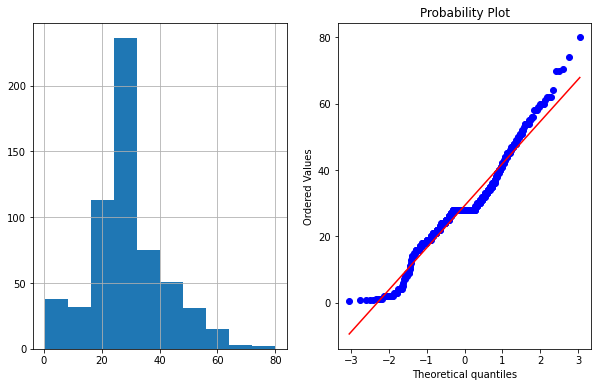

Log Transformation


<ipython-input-35-7f3551c828e6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var+'_log']=np.log(df[var])


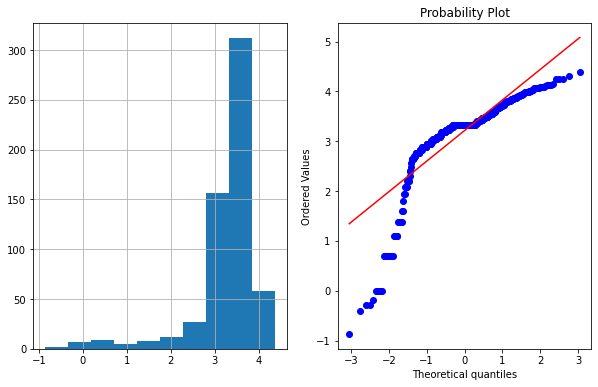

Reciprocal Transformation


<ipython-input-35-7f3551c828e6>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var + '_reciprocal'] = 1/df[var]


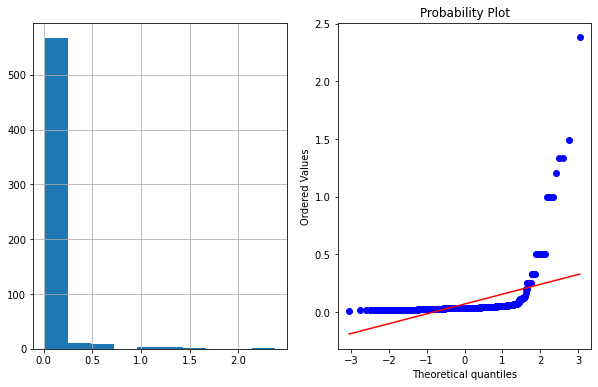

Square root transformation


<ipython-input-35-7f3551c828e6>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var+'_square'] = df[var]**(1/2)


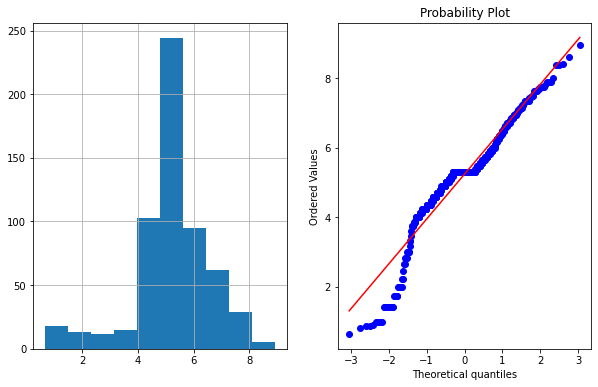

<ipython-input-35-7f3551c828e6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var+'_exponential'] = df[var]**(1/1.2)


Exponential Tranformation


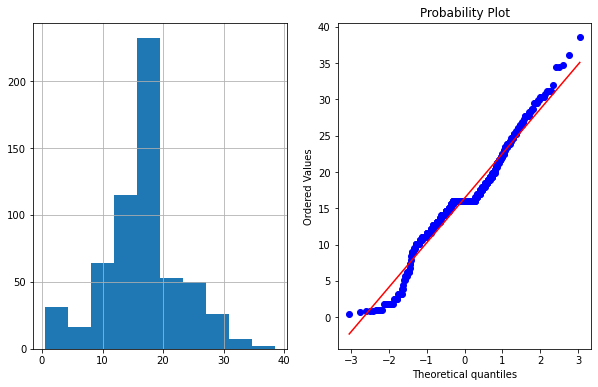

Boxcox Transformation


<ipython-input-35-7f3551c828e6>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[var+'_Boxcox'],parameters=stat.boxcox(df[var])


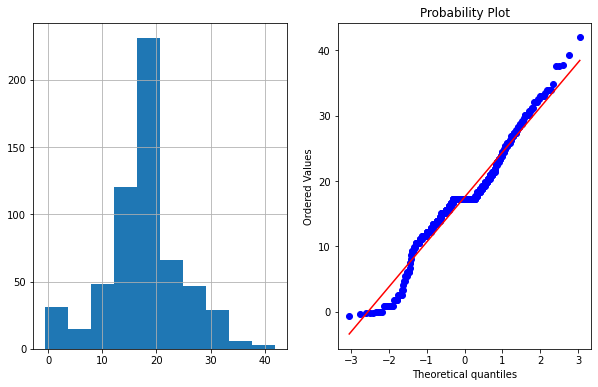

In [36]:
transformation_plot(X_train, ['Age'])

* We see that Age is not completely normally distributed. So we will try with different transformation to convert it to normal distribution data


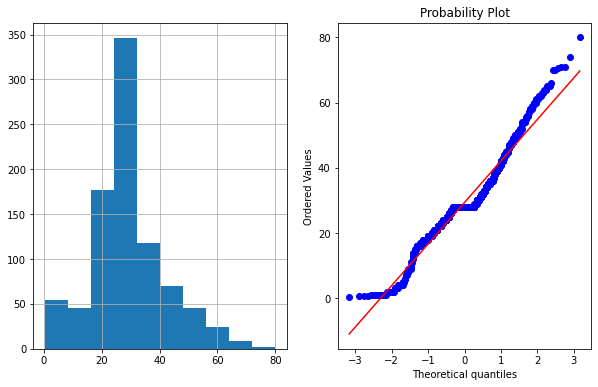

In [20]:
plot_data(df,'Age')

#### A) Logarithmic Transformation

**How it works?**<br>
Applying log transformation to any feature means taking the log(x) for each value of x of that feature.
**In which cases do we also perform log transformation?**<br>
1.As we said we applying log transformation to features before using for example Linear Regression model to convert them to Normally Distributed Data (remove skewness).
2. When dealing with Linear Regression we could also apply log to any feature/target and have a better linear relationship betweeen the transformed features and then use LinearRegression to fit the best line to the data. (it increases the performance of LinearRegression model); but remember how to interpret the result of the model.
Example A) log(y) = 0.02x + 5
Example B) log(y) = 0.02log(x) + 5
Example C) y = 0.02log(x) + 5

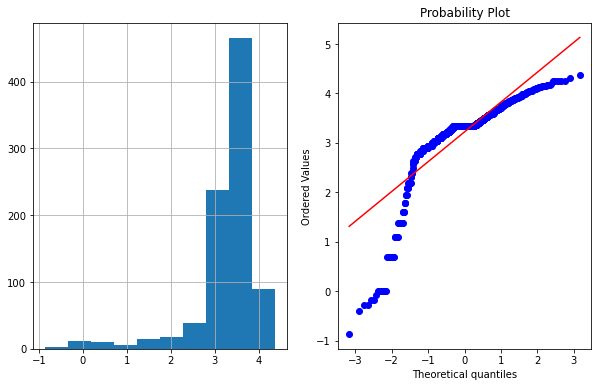

In [21]:
import numpy as np
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

* In all plots below we have : On the left side we have the distribution of the feature Age. On the right side we can check if the distribution of feature follows the Gaussian Distribution. If the points follow the lines, it means that the data follows more the Gaussian Distribution.
* We must choose the transformation that transforms the feature into normally distributed in the best form.

#### B) Reciprocal Trnasformation 

**How it works?**<br>
We take the inverse of each value.

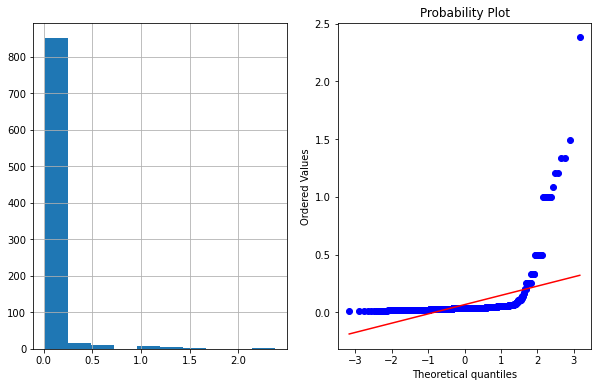

In [22]:
df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal')

#### C) Square Root Transformation

**How it works?**<br>
We take the square root of each value in the feature.

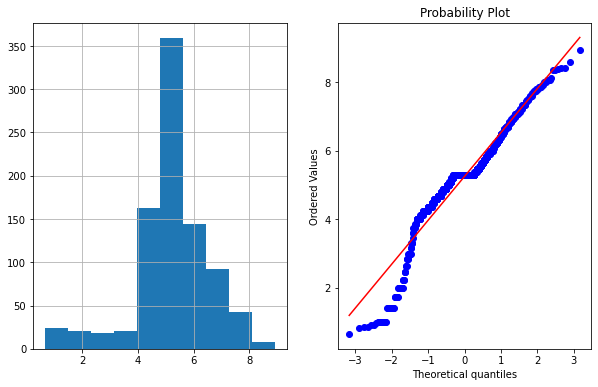

In [23]:
df['Age_sqaure']=df.Age**(1/2)
plot_data(df,'Age_sqaure')

#### D) Exponential Transdormation

**How it works?**<br>
We take the e to the power of each value in that feature.

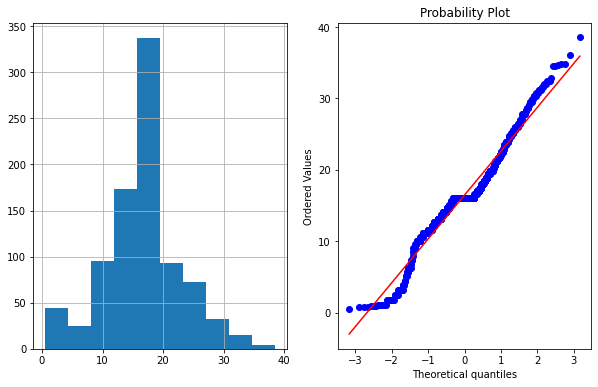

In [24]:
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')

#### E) BoxCOx Transformation

**How it works?** <br>
The Box-Cox transformation is defined as: 

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ  are considered and the optimal value for a given variable is selected.

In [25]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])
print(parameters)

0.7964531473656952


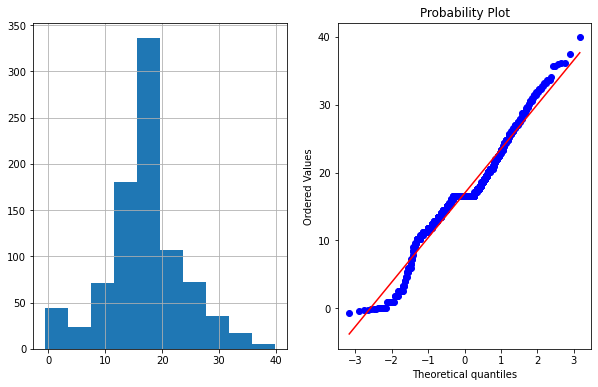

In [26]:
plot_data(df,'Age_Boxcox')